In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
df = pd.read_csv("./data/users/user_survey_raw.csv")

col_names = ["ts","version","application","switch","share","choice","cyclone_confidence","cyclone_nps","cyclone_narrative",
             "cyclone_over_fast","fast_confidence","fast_nps","fast_narrative","fast_over_cyclone"]
df.columns = col_names
df.head()

,ts,version,application,switch,share,choice,cyclone_confidence,cyclone_nps,cyclone_narrative,cyclone_over_fast,fast_confidence,fast_nps,fast_narrative,fast_over_cyclone
0,2021/10/05 4:39:51 PM MDT,ROS 2 Rolling Ridley,"one robot over local wired network, with occas...",Yes,NaN,Cyclone DDS,5.0,6.0,NaN,Crashing services; RMW or DDS layer exceptions...,NaN,NaN,NaN,NaN
1,2021/10/05 6:51:39 PM MDT,ROS 2 Foxy Fitzroy,multiple robots communicating over 5G / 4G / l...,Yes,I would say Cyclone is the best compatible DDS...,Cyclone DDS,10.0,10.0,I think we should give Cyclone DDS a change to...,NaN,NaN,NaN,NaN,NaN
2,2021/10/05 7:26:06 PM MDT,ROS 2 Foxy Fitzroy,Auto discover other robots in the same WiFi ne...,Yes,Stability is the key,Cyclone DDS,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/10/05 7:33:18 PM MDT,ROS 2 Foxy Fitzroy,"5G, LTE, WiFi, lan, other",Yes,"We test for reliability, as well as performanc...",Cyclone DDS,10.0,10.0,I have 100% confidence in cyclone as a middlew...,NaN,NaN,NaN,NaN,NaN
4,2021/10/05 7:35:31 PM MDT,ROS 2 Galactic Geochelone,one robot one host one developer viewer with z...,Yes,NaN,Cyclone DDS,10.0,10.0,NaN,did not work well with bare RTPS with default ...,NaN,NaN,NaN,NaN


In [3]:
t = df["version"]

In [4]:

out =  df.groupby(["choice"])
cyclone = out.get_group("Cyclone DDS")
test = cyclone.groupby("version").count()["ts"].tolist()
cyclone.groupby("version").count()["ts"].keys().tolist()

['I did not use ROS 2',
 'ROS 2 Dashing Diademata',
 'ROS 2 Foxy Fitzroy',
 'ROS 2 Galactic Geochelone',
 'ROS 2 Rolling Ridley']

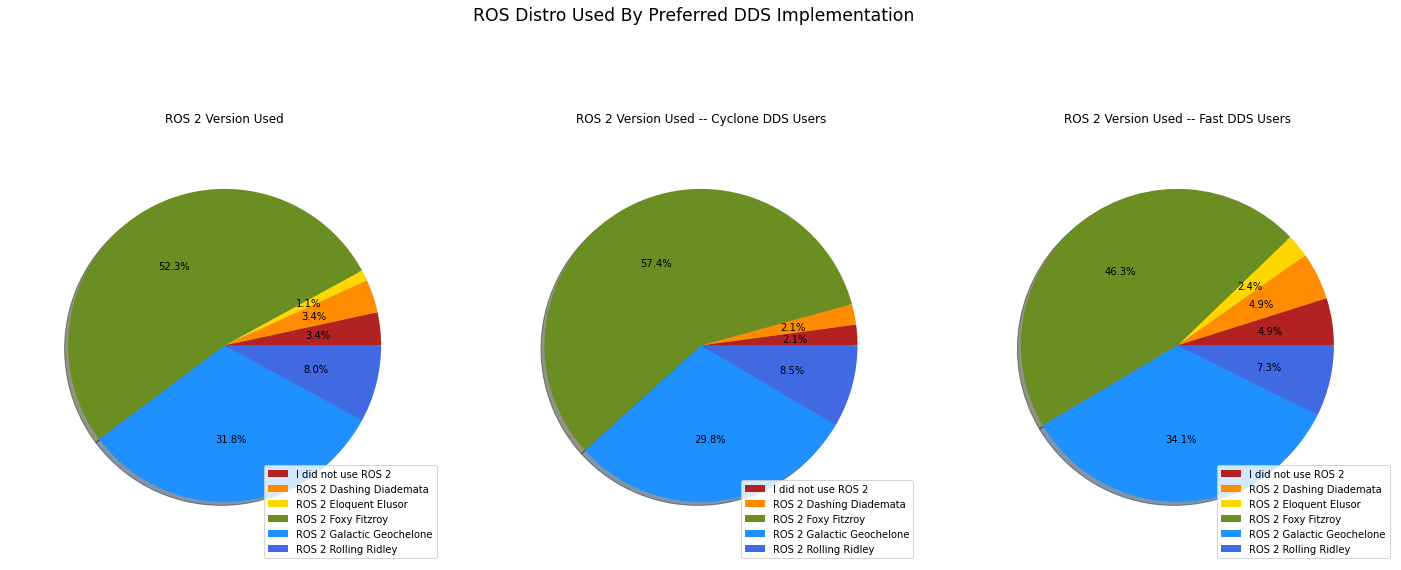

In [5]:
# Let's start with a pie chart for ROS version, one for All, Cyclone, Fast
fig, ax = plt.subplots(1,3,figsize=(20, 10))
fig.tight_layout()

names = df.groupby("version").count()["ts"].keys().tolist()
colors = ["firebrick","darkorange","gold","olivedrab","dodgerblue","royalblue","purple"]
color_assign = {}
for idx,name in enumerate(names):
    color_assign[name] = colors[idx]

################################################
title = "ROS 2 Version Used"
ax[0].set_title(title)

names = df.groupby("version").count()["ts"].keys().tolist()
vals = df.groupby("version").count()["ts"].values

c_list = []
for name in names:
    c_list.append(color_assign[name])

patches,text,auto =ax[0].pie(vals,autopct='%1.1f%%', colors=c_list, shadow=True,radius=0.9)
ax[0].legend(names)
ax[0].legend(names,loc='lower right')

################################################
title = "ROS 2 Version Used -- Cyclone DDS Users"
ax[1].set_title(title)

out =  df.groupby(["choice"])
cyclone = out.get_group("Cyclone DDS")
names = cyclone.groupby("version").count()["ts"].keys().tolist()
vals = cyclone.groupby("version").count()["ts"].tolist()

c_list = []
for name in names:
    c_list.append(color_assign[name])


patches,text,auto =ax[1].pie(vals,colors=c_list, autopct='%1.1f%%', shadow=True,radius=0.9)
ax[1].legend(names,loc='lower right')
################################################
title = "ROS 2 Version Used -- Fast DDS Users"
ax[2].set_title(title)

out =  df.groupby(["choice"])
fast = out.get_group("Fast DDS")
names = fast.groupby("version").count()["ts"].keys().tolist()
vals = fast.groupby("version").count()["ts"].tolist()

c_list = []
for name in names:
    c_list.append(color_assign[name])


patches,text,auto =ax[2].pie(vals, colors=c_list,autopct='%1.1f%%', shadow=True,radius=0.9)
ax[2].legend(names)
ax[2].legend(names,loc='lower right')


plt.suptitle("ROS Distro Used By Preferred DDS Implementation",fontsize="xx-large")
plt.savefig("./plots/ROS2Version.png")
plt.show()

[47 41]


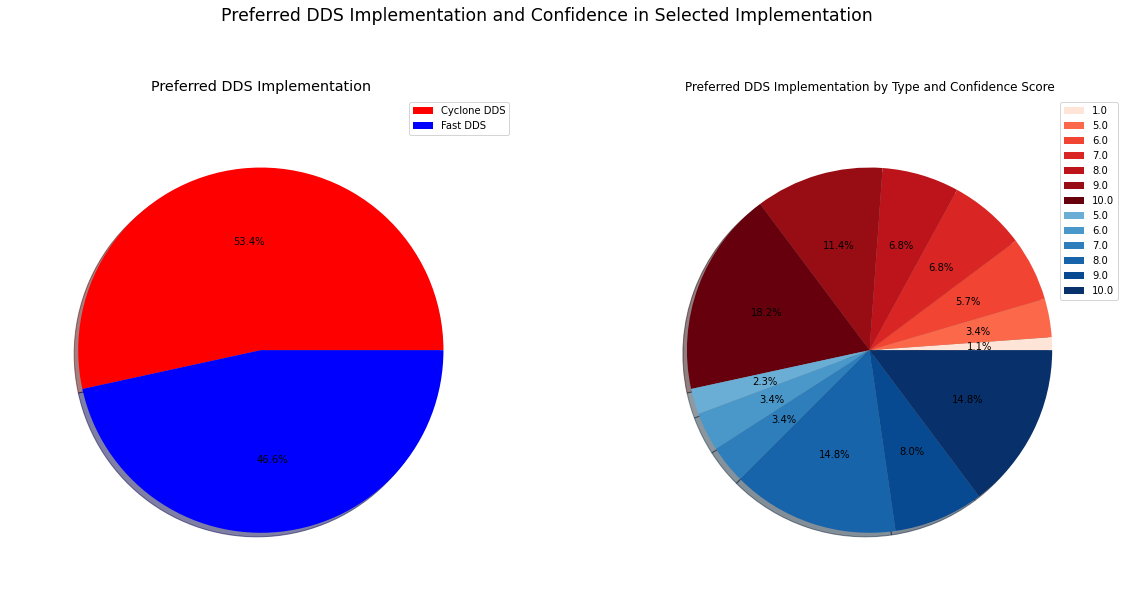

In [6]:
cm = plt.get_cmap('Reds')
# Now do the user choice
fig, ax = plt.subplots(1,2,figsize=(20, 10))
plt.suptitle("Preferred DDS Implementation and Confidence in Selected Implementation",fontsize="xx-large")

################################################
title = "Preferred DDS Implementation"
ax[0].set_title(title,fontsize="x-large")

names = df.groupby("choice").count()["ts"].keys().tolist()
vals = df.groupby("choice").count()["ts"].values
print(vals)
patches,text,auto =ax[0].pie(vals,autopct='%1.1f%%', colors=["red","blue"], shadow=True,radius=0.9)
ax[0].legend(names)
################################################
title = "ROS 2 Version Used -- Cyclone DDS Users"
ax[1].set_title(title,fontsize="x-large")

out =  df.groupby(["choice"])
cyclone = out.get_group("Cyclone DDS")
names = cyclone.groupby("cyclone_confidence").count()["ts"].keys().tolist()
vals = cyclone.groupby("cyclone_confidence").count()["ts"].tolist()
cm = plt.get_cmap('Reds')
cs = []
for v in names:
    cs.append(cm((float(v)/10.0)))

out =  df.groupby(["choice"])
fast = out.get_group("Fast DDS")
vals2 = fast.groupby("fast_confidence").count()["ts"].tolist()
names2 = fast.groupby("fast_confidence").count()["ts"].keys().tolist()

cm = plt.get_cmap('Blues')
for v in names2:
    cs.append(cm((float(v)/10.0)))

    
    
vals = vals + vals2
names = names + names2
patches,text,auto =ax[1].pie(vals, autopct='%1.1f%%', colors=cs,shadow=True,radius=0.9)
ax[1].legend(names)
title = "Preferred DDS Implementation by Type and Confidence Score"
ax[1].set_title(title)
plt.savefig("./plots/ROS2Choice.png")
plt.show()



[32 56]


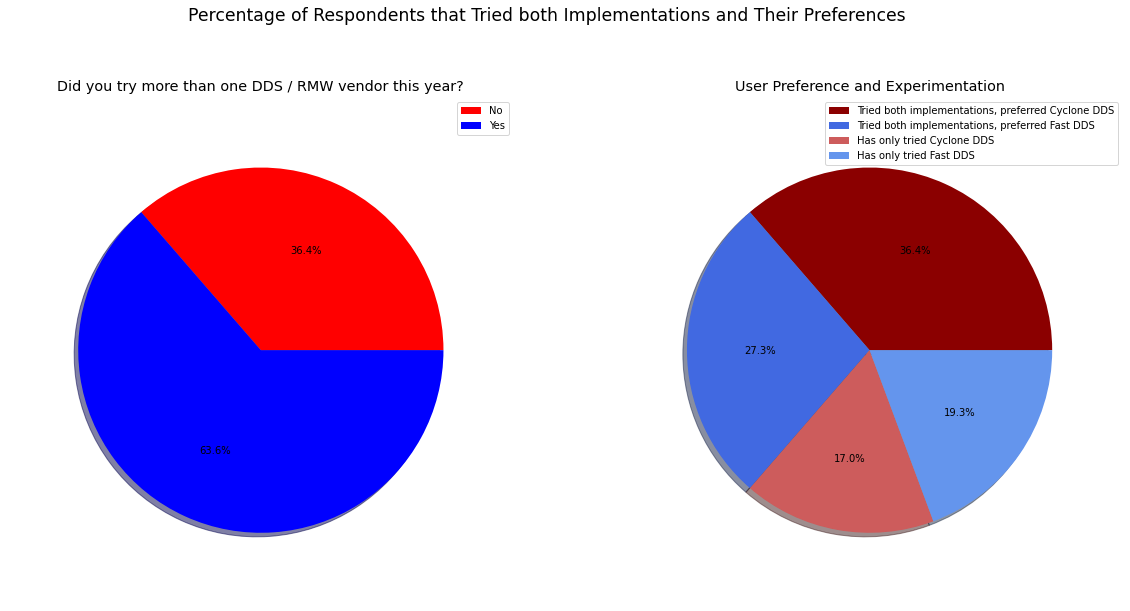

In [7]:
cm = plt.get_cmap('Reds')
# Now do the user choice
fig, ax = plt.subplots(1,2,figsize=(20, 10))
plt.suptitle("Percentage of Respondents that Tried both Implementations and Their Preferences",fontsize="xx-large")

################################################
title = "Did you try more than one DDS / RMW vendor this year?"
ax[0].set_title(title,fontsize="x-large")

names = df.groupby("switch").count()["ts"].keys().tolist()
vals = df.groupby("switch").count()["ts"].values
print(vals)
patches,text,auto =ax[0].pie(vals,autopct='%1.1f%%', colors=["red","blue"], shadow=True,radius=0.9)
ax[0].legend(names)
################################################

out =  df.groupby(["switch"])
switch = out.get_group("Yes")
names = switch.groupby("choice").count()["ts"].keys().tolist()
vals = switch.groupby("choice").count()["ts"].tolist()

new_names = []
for name in names:
    new_names.append("Tried both implementations, preferred " + name)
names = new_names
    
out =  df.groupby(["switch"])
no_switch = out.get_group("No")
vals2 = no_switch.groupby("choice").count()["ts"].tolist()
names2 = no_switch.groupby("choice").count()["ts"].keys().tolist()

new_names2 = []
for name in names2:
    new_names2.append("Has only tried " + name)
names2 = new_names2


vals = vals + vals2
names = names + names2

colors = ["darkred","royalblue","indianred","cornflowerblue"]

patches,text,auto =ax[1].pie(vals, autopct='%1.1f%%',colors=colors, shadow=True,radius=0.9)
ax[1].legend(names)
title = "User Preference and Experimentation"
ax[1].set_title(title,fontsize="x-large")
plt.savefig("./plots/SwitchChoice.png")
plt.show()

8.53191489361702
9.0
8.926829268292684
9.0


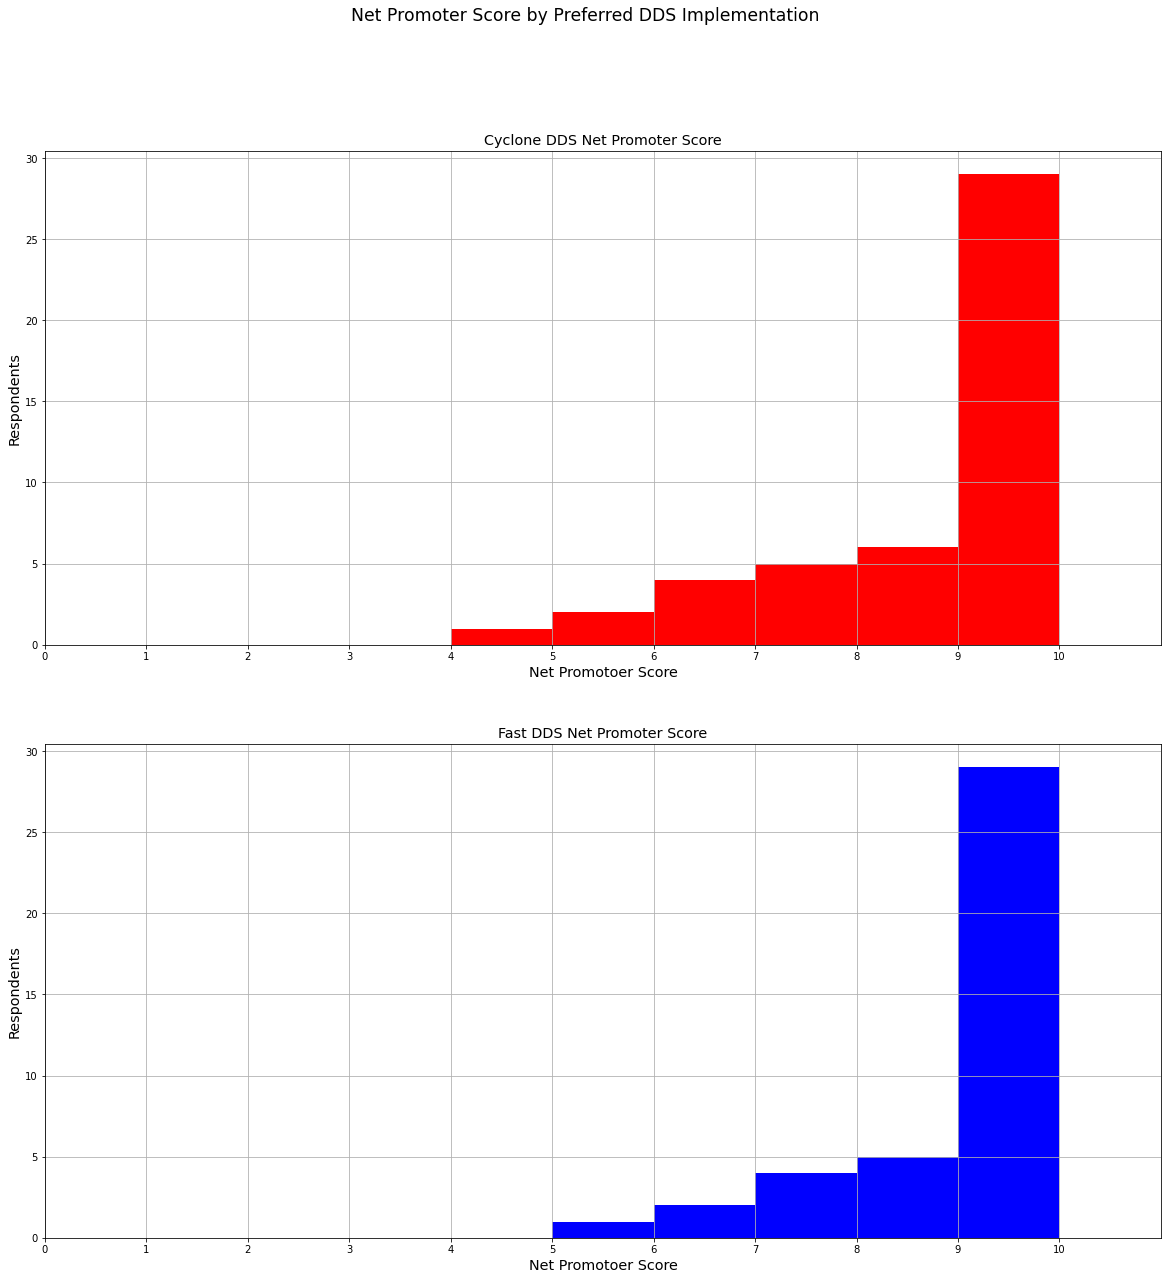

In [8]:
fig, ax = plt.subplots(2,1,figsize=(20, 20))
plt.suptitle("Net Promoter Score by Preferred DDS Implementation",fontsize="xx-large")

out =  df.groupby(["choice"])
cyclone = out.get_group("Cyclone DDS")
print(np.mean(cyclone["cyclone_nps"]))
print(np.median(cyclone["cyclone_nps"]))

ax[0].hist(cyclone["cyclone_nps"],density=False,align="mid",range=[0,10],bins=10, color="red")
ax[0].grid()
ax[0].set_xlim(0,11)
ticks = np.arange(0,11,1)
tick_names = ["{0}".format(t) for t in ticks]
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tick_names)
ax[0].set_ylabel("Respondents",fontsize="x-large")
ax[0].set_xlabel("Net Promotoer Score",fontsize="x-large")
ax[0].set_title("Cyclone DDS Net Promoter Score",fontsize="x-large")

out =  df.groupby(["choice"])
fast = out.get_group("Fast DDS")
print(np.mean(fast["fast_nps"]))
print(np.median(fast["fast_nps"]))

bottom = np.arange(0,10,1)
ax[1].hist(fast["fast_nps"],density=False,align="mid",range=[0,10],bins=10, color="blue")
ax[1].grid()
ax[1].set_xlim(0,11)
ticks = np.arange(0,11,1)
tick_names = ["{0}".format(t) for t in ticks]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_names)
ax[1].set_ylabel("Respondents",fontsize="x-large")
ax[1].set_xlabel("Net Promotoer Score",fontsize="x-large")
ax[1].set_title("Fast DDS Net Promoter Score",fontsize="x-large")
plt.savefig("./plots/DDSNPS.png")
plt.show()
